In [3]:
import pandas as pd 
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from time import time  # To time our operations
from collections import defaultdict  # For word frequency
import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
import nltk
from gensim.models.phrases import Phrases, Phraser
import multiprocessing
from gensim.models import Word2Vec

### Read cleaned csv

In [4]:
df=pd.read_csv('lemma_no_stop_abstract.csv')

In [5]:
df

,abstract,date
0,peter mark analysis find commercial run presid...,2000-01-01 05:00:00+00:00
1,new york time internet political campaign,2000-01-01 05:00:00+00:00
2,letter mike fremont river unlimited gain clean...,2000-01-02 05:00:00+00:00
3,presidential primary season competitive year c...,2000-01-02 05:00:00+00:00
4,editorial various campaign proposal using fede...,2000-01-02 05:00:00+00:00
...,...,...
57257,new gender policy council look different counc...,2021-02-16 18:27:12+00:00
57258,nearly three decade white house established fi...,2021-02-16 18:27:23+00:00
57259,following million divisive style mockery griev...,2021-02-17 17:35:38+00:00
57260,rush limbaugh made gop party misogyny,2021-02-20 11:55:04+00:00


### Convert abstracts to string, needed after read from csv

In [6]:
df['abstract']=df['abstract'].astype(str)

### create a list which contains each abstract in list form

In [7]:
sent=[row.split() for row in df["abstract"]]

In [8]:
sent

[['peter',
  'mark',
  'analysis',
  'find',
  'commercial',
  'run',
  'presidential',
  'campaign',
  'far',
  'remarkably',
  'tame',
  'candidate',
  'apparently',
  'unwilling',
  'first',
  'go',
  'negative'],
 ['new', 'york', 'time', 'internet', 'political', 'campaign'],
 ['letter',
  'mike',
  'fremont',
  'river',
  'unlimited',
  'gain',
  'cleaning',
  'nation',
  'river',
  'making',
  'corridor',
  'scenic'],
 ['presidential',
  'primary',
  'season',
  'competitive',
  'year',
  'could',
  'also',
  'shortest',
  'several',
  'state',
  'moved',
  'primary',
  'order',
  'exercise',
  'greater',
  'sway',
  'map',
  'primary',
  'caucus',
  'schedule',
  'photo'],
 ['editorial',
  'various',
  'campaign',
  'proposal',
  'using',
  'federal',
  'budget',
  'surplus',
  'warns',
  'current',
  'spending',
  'level',
  'cut',
  'year',
  'rise',
  'rate',
  'inflation',
  'tenyear',
  'surplus',
  'shrink',
  'billion',
  'even',
  'le',
  'recall',
  'enduring',
  'lesson

### Build and run through to phrases, to detect multiword phrases

In [9]:
phrases = Phrases(sent, min_count=30, progress_per=10000)

INFO - 09:57:50: collecting all words and their counts
INFO - 09:57:50: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 09:57:51: PROGRESS: at sentence #10000, processed 443066 words and 295433 word types
INFO - 09:57:51: PROGRESS: at sentence #20000, processed 884299 words and 533172 word types
INFO - 09:57:51: PROGRESS: at sentence #30000, processed 1080397 words and 616314 word types
INFO - 09:57:52: PROGRESS: at sentence #40000, processed 1208630 words and 680083 word types
INFO - 09:57:52: PROGRESS: at sentence #50000, processed 1454013 words and 783827 word types
INFO - 09:57:52: collected 824691 word types from a corpus of 1553765 words (unigram + bigrams) and 57262 sentences
INFO - 09:57:52: using 824691 counts as vocab in Phrases<0 vocab, min_count=30, threshold=10.0, max_vocab_size=40000000>


In [10]:
sentences = phrases[sent]

### Create dictionary that counts freq of words

In [11]:
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)

45084

### Most frequently used words

In [12]:
sorted(word_freq, key=word_freq.get, reverse=True)[:10]

['say',
 'bush',
 'pres_bush',
 'president',
 'republican',
 'would',
 'american',
 'bush_administration',
 'new',
 'iraq']

### Determine number of cores for word2vec model

In [13]:
cores = multiprocessing.cpu_count()

In [14]:
cores

8

### Initialize word2vec model, build the vocab, and then train the model

In [15]:
w2v_model = Word2Vec(size=100, window=5, min_count=20,workers=6)

In [16]:
t=time()

In [17]:
w2v_model.build_vocab(sentences, progress_per=10000)

print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

INFO - 09:58:02: collecting all words and their counts
INFO - 09:58:02: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 09:58:03: PROGRESS: at sentence #10000, processed 400694 words, keeping 24295 word types
INFO - 09:58:04: PROGRESS: at sentence #20000, processed 802331 words, keeping 33747 word types
INFO - 09:58:04: PROGRESS: at sentence #30000, processed 980302 words, keeping 36837 word types
INFO - 09:58:05: PROGRESS: at sentence #40000, processed 1098295 words, keeping 39604 word types
INFO - 09:58:05: PROGRESS: at sentence #50000, processed 1319427 words, keeping 43828 word types
INFO - 09:58:05: collected 45084 word types from a corpus of 1408545 raw words and 57262 sentences
INFO - 09:58:05: Loading a fresh vocabulary
INFO - 09:58:06: effective_min_count=20 retains 7956 unique words (17% of original 45084, drops 37128)
INFO - 09:58:06: effective_min_count=20 leaves 1279886 word corpus (90% of original 1408545, drops 128659)
INFO - 09:58:06: deleting t

Time to build vocab: 0.09 mins


In [18]:
t = time()

In [19]:
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

INFO - 09:58:19: training model with 6 workers on 7956 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
INFO - 09:58:20: EPOCH 1 - PROGRESS: at 15.36% examples, 298027 words/s, in_qsize 0, out_qsize 0
INFO - 09:58:21: EPOCH 1 - PROGRESS: at 29.99% examples, 303889 words/s, in_qsize 0, out_qsize 0
INFO - 09:58:22: EPOCH 1 - PROGRESS: at 61.85% examples, 300185 words/s, in_qsize 0, out_qsize 0
INFO - 09:58:23: EPOCH 1 - PROGRESS: at 93.71% examples, 291431 words/s, in_qsize 0, out_qsize 0
INFO - 09:58:24: worker thread finished; awaiting finish of 5 more threads
INFO - 09:58:24: worker thread finished; awaiting finish of 4 more threads
INFO - 09:58:24: worker thread finished; awaiting finish of 3 more threads
INFO - 09:58:24: worker thread finished; awaiting finish of 2 more threads
INFO - 09:58:24: worker thread finished; awaiting finish of 1 more threads
INFO - 09:58:24: worker thread finished; awaiting finish of 0 more threads
INFO - 09:58:24: EPOCH - 1 : 

INFO - 09:58:56: worker thread finished; awaiting finish of 1 more threads
INFO - 09:58:56: worker thread finished; awaiting finish of 0 more threads
INFO - 09:58:56: EPOCH - 9 : training on 1408545 raw words (1235943 effective words) took 4.1s, 302500 effective words/s
INFO - 09:58:57: EPOCH 10 - PROGRESS: at 15.36% examples, 304783 words/s, in_qsize 0, out_qsize 0
INFO - 09:58:58: EPOCH 10 - PROGRESS: at 29.46% examples, 305213 words/s, in_qsize 0, out_qsize 0
INFO - 09:58:59: EPOCH 10 - PROGRESS: at 60.40% examples, 301061 words/s, in_qsize 0, out_qsize 0
INFO - 09:59:00: EPOCH 10 - PROGRESS: at 95.04% examples, 299065 words/s, in_qsize 0, out_qsize 0
INFO - 09:59:00: worker thread finished; awaiting finish of 5 more threads
INFO - 09:59:00: worker thread finished; awaiting finish of 4 more threads
INFO - 09:59:00: worker thread finished; awaiting finish of 3 more threads
INFO - 09:59:00: worker thread finished; awaiting finish of 2 more threads
INFO - 09:59:00: worker thread finish

INFO - 09:59:33: worker thread finished; awaiting finish of 5 more threads
INFO - 09:59:33: worker thread finished; awaiting finish of 4 more threads
INFO - 09:59:33: worker thread finished; awaiting finish of 3 more threads
INFO - 09:59:33: worker thread finished; awaiting finish of 2 more threads
INFO - 09:59:33: worker thread finished; awaiting finish of 1 more threads
INFO - 09:59:33: worker thread finished; awaiting finish of 0 more threads
INFO - 09:59:33: EPOCH - 18 : training on 1408545 raw words (1235884 effective words) took 4.1s, 304524 effective words/s
INFO - 09:59:34: EPOCH 19 - PROGRESS: at 15.80% examples, 309680 words/s, in_qsize 0, out_qsize 0
INFO - 09:59:35: EPOCH 19 - PROGRESS: at 29.99% examples, 307507 words/s, in_qsize 0, out_qsize 0
INFO - 09:59:36: EPOCH 19 - PROGRESS: at 63.29% examples, 303559 words/s, in_qsize 0, out_qsize 0
INFO - 09:59:37: EPOCH 19 - PROGRESS: at 97.82% examples, 300055 words/s, in_qsize 0, out_qsize 0
INFO - 09:59:37: worker thread finis

INFO - 10:00:07: EPOCH 27 - PROGRESS: at 14.55% examples, 284109 words/s, in_qsize 0, out_qsize 0
INFO - 10:00:08: EPOCH 27 - PROGRESS: at 28.43% examples, 295551 words/s, in_qsize 0, out_qsize 0
INFO - 10:00:10: EPOCH 27 - PROGRESS: at 56.11% examples, 291506 words/s, in_qsize 0, out_qsize 0
INFO - 10:00:11: EPOCH 27 - PROGRESS: at 89.52% examples, 290128 words/s, in_qsize 0, out_qsize 0
INFO - 10:00:11: worker thread finished; awaiting finish of 5 more threads
INFO - 10:00:11: worker thread finished; awaiting finish of 4 more threads
INFO - 10:00:11: worker thread finished; awaiting finish of 3 more threads
INFO - 10:00:11: worker thread finished; awaiting finish of 2 more threads
INFO - 10:00:11: worker thread finished; awaiting finish of 1 more threads
INFO - 10:00:11: worker thread finished; awaiting finish of 0 more threads
INFO - 10:00:11: EPOCH - 27 : training on 1408545 raw words (1235748 effective words) took 4.2s, 291126 effective words/s
INFO - 10:00:12: EPOCH 28 - PROGRESS

Time to train the model: 2.07 mins


### Check the model, find most similar words etc. 

In [21]:
w2v_model.wv.most_similar(positive=["president_george"])

[('president', 0.7302555441856384),
 ('mr', 0.4588528573513031),
 ('preselect_george', 0.4532397985458374),
 ('president_trump', 0.4522009491920471),
 ('president_obama', 0.4187754988670349),
 ('adminstrations', 0.4100605249404907),
 ('adminstration', 0.4027785062789917),
 ('preselect', 0.37944912910461426),
 ('gov_george', 0.3778377175331116),
 ('prime_minister', 0.3756914436817169)]

In [22]:
w2v_model.wv.most_similar(positive=["hillary_clinton"])

[('mr_clinton', 0.8220693469047546),
 ('senator_hillary', 0.5753641128540039),
 ('mr_trump', 0.49914756417274475),
 ('senator_bernie', 0.4808083176612854),
 ('democratic_candidate', 0.46247920393943787),
 ('john_kerry', 0.45943355560302734),
 ('hillary', 0.4553724229335785),
 ('sander', 0.45112231373786926),
 ('ted_cruz', 0.45088034868240356),
 ('bernie_sander', 0.44956475496292114)]

In [23]:
w2v_model.wv.most_similar(positive=["donald_trump"])

[('mr_trump', 0.6875516772270203),
 ('bernie_sander', 0.5961758494377136),
 ('barack_obama', 0.5520185232162476),
 ('mr_clinton', 0.5407881736755371),
 ('mr_sander', 0.5182924270629883),
 ('jeb_bush', 0.5121065378189087),
 ('president_trump', 0.5095650553703308),
 ('mitt_romney', 0.4693835973739624),
 ('president_obama', 0.4665164351463318),
 ('ted_cruz', 0.45684972405433655)]

In [24]:
w2v_model.wv.most_similar(positive=["mr_trump"])

[('donald_trump', 0.6875516176223755),
 ('mr_clinton', 0.6386044025421143),
 ('president_trump', 0.6121711730957031),
 ('president_obama', 0.5263864994049072),
 ('hillary_clinton', 0.49914759397506714),
 ('barack_obama', 0.4888889491558075),
 ('jeb_bush', 0.4806901514530182),
 ('bernie_sander', 0.47896134853363037),
 ('outrageous', 0.4567822813987732),
 ('trump', 0.45069587230682373)]

In [25]:
w2v_model.wv.most_similar(positive=["administration"])

[('bush_administration', 0.6871850490570068),
 ('administration_official', 0.5233721733093262),
 ('white_house', 0.4986458122730255),
 ('adminstration', 0.4725310504436493),
 ('presidentelect_barack', 0.471484899520874),
 ('pentagon', 0.4428045153617859),
 ('presidency', 0.3685579299926758),
 ('agency', 0.36788952350616455),
 ('longstanding', 0.35236331820487976),
 ('nuclear_weapon', 0.34194743633270264)]

In [26]:
w2v_model.wv.most_similar(positive=["secretary_state"])

[('foreign_minister', 0.44922682642936707),
 ('tokyo', 0.430433452129364),
 ('ambassador', 0.4219436049461365),
 ('first_lady', 0.42033377289772034),
 ('envoy', 0.4092676341533661),
 ('sec', 0.3982252776622772),
 ('secretary', 0.39234432578086853),
 ('fbi_director', 0.3744584023952484),
 ('rice', 0.37061524391174316),
 ('state_department', 0.3662693500518799)]

In [27]:
w2v_model.wv.most_similar(positive=["condoleezza_rice"])

[('colin_powell', 0.8475638628005981),
 ('rice', 0.7014211416244507),
 ('state_condoleezza', 0.567313551902771),
 ('katherine_harris', 0.5384743809700012),
 ('madeleine', 0.4897814095020294),
 ('stephen_hadley', 0.4697198271751404),
 ('state_colin', 0.4664815664291382),
 ('adviser_condoleezza', 0.46170443296432495),
 ('armitage', 0.4542850852012634),
 ('zinni', 0.4536418914794922)]

In [28]:
w2v_model.wv.most_similar(positive=["colin_powell"])

[('condoleezza_rice', 0.8475638628005981),
 ('rice', 0.6394491195678711),
 ('katherine_harris', 0.5905646085739136),
 ('state_condoleezza', 0.5144354701042175),
 ('armitage', 0.4732981324195862),
 ('state_colin', 0.468009889125824),
 ('annan', 0.45826786756515503),
 ('karen_hughes', 0.4568556547164917),
 ('john_bolton', 0.45669710636138916),
 ('madeleine', 0.4487408697605133)]

In [29]:
w2v_model.wv.most_similar(positive=['first_lady'])

[('laura_bush', 0.542932391166687),
 ('wife', 0.5341531038284302),
 ('chelsea_clinton', 0.49814218282699585),
 ('michelle_obama', 0.4877147078514099),
 ('husband', 0.48391881585121155),
 ('bos', 0.45298969745635986),
 ('bill_clinton', 0.4485580325126648),
 ('sitting', 0.4414285719394684),
 ('governor', 0.42566731572151184),
 ('secretary_state', 0.42033377289772034)]

In [30]:
w2v_model.wv.most_similar(positive=["bill_clinton"])

[('clinton', 0.6504240036010742),
 ('ronald_reagan', 0.6123673915863037),
 ('george_bush', 0.5912537574768066),
 ('jimmy_carter', 0.5861592888832092),
 ('richard_nixon', 0.5739996433258057),
 ('wife', 0.5562328696250916),
 ('lyndon_johnson', 0.5322867035865784),
 ('gerald_ford', 0.498482346534729),
 ('mr_clinton', 0.49013644456863403),
 ('husband', 0.45956021547317505)]

In [31]:
w2v_model.wv.most_similar(positive=["outrageous"])

[('sexual', 0.4785764217376709),
 ('monica_lewinsky', 0.4740319848060608),
 ('mr_trump', 0.4567822217941284),
 ('shameful', 0.4330025911331177),
 ('dishonest', 0.4300805628299713),
 ('graham', 0.4104892313480377),
 ('racist', 0.4040186107158661),
 ('misconduct', 0.40361288189888),
 ('controversy', 0.4018551707267761),
 ('character', 0.3974650800228119)]

In [32]:
w2v_model.wv.most_similar(positive=["trump"])

[('obama', 0.6119835376739502),
 ('obamas', 0.5328373908996582),
 ('food_drug', 0.47034281492233276),
 ('mr_trump', 0.45069587230682373),
 ('barack_obamas', 0.44986429810523987),
 ('george_bush', 0.44754764437675476),
 ('clearly', 0.44210028648376465),
 ('reagan', 0.43947726488113403),
 ('clinton', 0.4225619435310364),
 ('bushcheney', 0.41486871242523193)]

In [33]:
w2v_model.wv.most_similar(positive=['hillary'])

[('pretty', 0.47610291838645935),
 ('chelsea_clinton', 0.47257497906684875),
 ('hillary_clinton', 0.4553724229335785),
 ('super', 0.4250738024711609),
 ('soul', 0.42398661375045776),
 ('painting', 0.4230304956436157),
 ('guess', 0.4205695390701294),
 ('featuring', 0.41439923644065857),
 ('john_mccain', 0.4143953323364258),
 ('hell', 0.40942203998565674)]

In [34]:
w2v_model.wv.most_similar(positive=["donald"])

[('gerald', 0.6321799755096436),
 ('michael', 0.6298329830169678),
 ('leslie', 0.613174557685852),
 ('jennifer', 0.6077337861061096),
 ('steven', 0.6010658740997314),
 ('sullivan', 0.597224235534668),
 ('ronald', 0.5950602293014526),
 ('evans', 0.5948807597160339),
 ('philip', 0.5941694974899292),
 ('lynn', 0.5851796865463257)]

In [35]:
w2v_model.wv.most_similar(positive=["bill"])

[('legislation', 0.8905713558197021),
 ('measure', 0.7739048004150391),
 ('legislation_would', 0.7063065767288208),
 ('bill_passed', 0.6597579717636108),
 ('package', 0.5982891917228699),
 ('spending_bill', 0.5855980515480042),
 ('provision', 0.5844132304191589),
 ('proposal', 0.5384923219680786),
 ('plan', 0.5077462196350098),
 ('amendment', 0.4718981385231018)]

In [36]:
w2v_model.wv.most_similar(positive=["madeleine"])

[('albright', 0.9159063696861267),
 ('armitage', 0.5793330073356628),
 ('dae', 0.5688040256500244),
 ('bob_woodward', 0.5574924945831299),
 ('bumiller', 0.552133321762085),
 ('jung', 0.5437352657318115),
 ('moo', 0.5346031188964844),
 ('cohen', 0.5228038430213928),
 ('kim', 0.5169758796691895),
 ('asst', 0.5165773630142212)]

In [37]:
w2v_model.wv.most_similar(positive=["chelsea"])

[('jenna', 0.6538681387901306),
 ('queen', 0.6099622249603271),
 ('mother', 0.6003167629241943),
 ('ga', 0.5979706048965454),
 ('daughter', 0.5847387313842773),
 ('gallery', 0.5825690627098083),
 ('laura', 0.5632615089416504),
 ('apartment', 0.5561379790306091),
 ('hat', 0.5539106726646423),
 ('restaurant', 0.5477283000946045)]

In [38]:
w2v_model.wv.most_similar(positive=["jenna"])

[('barbara', 0.7392537593841553),
 ('daughter', 0.7201859354972839),
 ('chelsea', 0.6538680791854858),
 ('twin', 0.606640636920929),
 ('elizabeth', 0.6059657335281372),
 ('wife_laura', 0.6040425896644592),
 ('laura', 0.5796372890472412),
 ('wife', 0.5790818929672241),
 ('ellen', 0.5711087584495544),
 ('chelsea_clinton', 0.567460298538208)]

In [39]:
w2v_model.wv.most_similar(positive=["barbara"])

[('jenna', 0.7392536401748657),
 ('lisa', 0.6307448148727417),
 ('boxer', 0.623417854309082),
 ('jerry', 0.6148184537887573),
 ('jennifer', 0.5930877923965454),
 ('ted', 0.5733916759490967),
 ('feinstein', 0.571562647819519),
 ('donna', 0.5684393644332886),
 ('ron', 0.5647658109664917),
 ('dianne', 0.5623676776885986)]

In [40]:
w2v_model.wv.most_similar(positive=['barack'])

[('rudy', 0.5219851732254028),
 ('senator_barack', 0.5041895508766174),
 ('concedes', 0.49066197872161865),
 ('stood', 0.4675937592983246),
 ('presidentelect_barack', 0.46496567130088806),
 ('denver', 0.45723795890808105),
 ('keynote', 0.4348944425582886),
 ('son', 0.4300018548965454),
 ('freshman', 0.4174764156341553),
 ('picked', 0.4162158966064453)]

In [41]:
w2v_model.wv.most_similar(positive=['michelle'])

[('laura_bush', 0.6531978249549866),
 ('wife_laura', 0.5956083536148071),
 ('elizabeth', 0.5948790311813354),
 ('teresa', 0.5825245976448059),
 ('fallon', 0.5673333406448364),
 ('monologue', 0.5659838914871216),
 ('night_late', 0.5550680160522461),
 ('inaugural', 0.5515411496162415),
 ('david_letterman', 0.5435776710510254),
 ('rose_garden', 0.5411909818649292)]

In [42]:
w2v_model.wv.most_similar(positive=['obama'])

[('obamas', 0.7859631180763245),
 ('trump', 0.6119835376739502),
 ('barack_obama', 0.526599109172821),
 ('food_drug', 0.44900551438331604),
 ('barack_obamas', 0.4468039274215698),
 ('mr_trump', 0.4285909831523895),
 ('president_trump', 0.422635018825531),
 ('bloomberg', 0.4035298824310303),
 ('rubio', 0.40153834223747253),
 ('bushcheney', 0.3936663866043091)]

In [43]:
w2v_model.wv.most_similar(positive=['bush'])

[('pres_bush', 0.6900027990341187),
 ('bush_administration', 0.4971255958080292),
 ('president_obama', 0.4895545542240143),
 ('barack_obama', 0.4127376079559326),
 ('barack_obamas', 0.4044477045536041),
 ('congressional_democrat', 0.39295637607574463),
 ('pataki', 0.3776341378688812),
 ('white_house', 0.3718930780887604),
 ('president_trump', 0.37056398391723633),
 ('biden', 0.35736435651779175)]

In [44]:
w2v_model.wv.most_similar(positive=['barack'])

[('rudy', 0.5219851732254028),
 ('senator_barack', 0.5041895508766174),
 ('concedes', 0.49066197872161865),
 ('stood', 0.4675937592983246),
 ('presidentelect_barack', 0.46496567130088806),
 ('denver', 0.45723795890808105),
 ('keynote', 0.4348944425582886),
 ('son', 0.4300018548965454),
 ('freshman', 0.4174764156341553),
 ('picked', 0.4162158966064453)]

In [45]:
w2v_model.wv.most_similar(positive=['clinton'])

[('bill_clinton', 0.6504240036010742),
 ('mr_clinton', 0.5669869780540466),
 ('george_bush', 0.47454962134361267),
 ('reagan', 0.4631655812263489),
 ('hillary_clinton', 0.43077659606933594),
 ('lyndon_johnson', 0.42867350578308105),
 ('john_spencer', 0.4235301613807678),
 ('trump', 0.4225619435310364),
 ('husband', 0.41903501749038696),
 ('mcfarland', 0.38842880725860596)]

In [46]:
w2v_model.wv.most_similar(positive=['wife'])

[('daughter', 0.6146023273468018),
 ('husband', 0.5924025774002075),
 ('jenna', 0.5790818929672241),
 ('mother', 0.5567483901977539),
 ('bill_clinton', 0.5562329292297363),
 ('chelsea_clinton', 0.5402801036834717),
 ('first_lady', 0.5341531038284302),
 ('elizabeth', 0.5224337577819824),
 ('laura_bush', 0.5075224041938782),
 ('abedin', 0.49583640694618225)]

In [47]:
w2v_model.wv.most_similar(positive=['husband'])

[('wife', 0.592402458190918),
 ('daughter', 0.4940088987350464),
 ('first_lady', 0.4839187264442444),
 ('monica_lewinsky', 0.4774058163166046),
 ('mother', 0.4610860347747803),
 ('bill_clinton', 0.45956021547317505),
 ('father', 0.4489942491054535),
 ('huma', 0.4465218484401703),
 ('son', 0.44459041953086853),
 ('abedin', 0.4439901113510132)]

In [48]:
w2v_model.wv.most_similar(positive=['bill_clinton'])

[('clinton', 0.6504240036010742),
 ('ronald_reagan', 0.6123673915863037),
 ('george_bush', 0.5912537574768066),
 ('jimmy_carter', 0.5861592888832092),
 ('richard_nixon', 0.5739996433258057),
 ('wife', 0.5562328696250916),
 ('lyndon_johnson', 0.5322867035865784),
 ('gerald_ford', 0.498482346534729),
 ('mr_clinton', 0.49013644456863403),
 ('husband', 0.45956021547317505)]

In [49]:
w2v_model.wv.most_similar(positive=['michelle'])

[('laura_bush', 0.6531978249549866),
 ('wife_laura', 0.5956083536148071),
 ('elizabeth', 0.5948790311813354),
 ('teresa', 0.5825245976448059),
 ('fallon', 0.5673333406448364),
 ('monologue', 0.5659838914871216),
 ('night_late', 0.5550680160522461),
 ('inaugural', 0.5515411496162415),
 ('david_letterman', 0.5435776710510254),
 ('rose_garden', 0.5411909818649292)]

In [50]:
w2v_model.wv.most_similar(positive=['sarah_palin'])

[('arnold_schwarzenegger', 0.6323226690292358),
 ('bill_richardson', 0.5844452381134033),
 ('rick_perry', 0.54869145154953),
 ('christie', 0.5253034830093384),
 ('presidential_nominee', 0.5202087163925171),
 ('frontrunner', 0.5072986483573914),
 ('haley', 0.4923088550567627),
 ('jeb_bush', 0.48917558789253235),
 ('david_paterson', 0.48656412959098816),
 ('funny', 0.4853071868419647)]

In [51]:
result = w2v_model.wv.most_similar(positive=['laura_bush', 'hillary_clinton'], negative=['first_lady'])
most_similar_key, similarity = result[0]  # look at the first match
print(f"{most_similar_key}: {similarity:.4f}")

mr_clinton: 0.5052


In [52]:
w2v_model.wv.doesnt_match(['clinton', 'bush', 'trump'])

/Users/mariamyousuf/opt/anaconda3/lib/python3.8/site-packages/gensim/models/keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'bush'

In [53]:
w2v_model.wv.doesnt_match(['hillary', 'bush', 'trump'])

'hillary'

In [54]:
w2v_model.wv.doesnt_match(['hillary', 'george', 'trump'])

'trump'

In [55]:
w2v_model.wv.doesnt_match(['hillary_clinton', 'george_bush', 'donald_trump'])

'hillary_clinton'

### Use tsne to reduce the word embedding vectors to 2-d and plot them 

In [88]:
keys = ['hillary_clinton','george_bush','hillary','george']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in w2v_model.wv.most_similar(word, topn=25):
        words.append(similar_word)
        embeddings.append(w2v_model.wv[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [89]:
embedding_clusters

[[array([-1.2129315e+00,  2.8965411e-01, -2.0642099e+00, -1.9516191e-01,
         -3.6664400e-01, -1.2522355e-01,  1.7707382e+00, -5.8233207e-01,
         -1.0538790e+00, -7.1104771e-01,  5.9941691e-01,  1.5507592e+00,
         -2.0660402e-01, -8.4976375e-01,  2.7451828e-01, -2.1785519e-01,
         -2.4091378e-01,  3.6371188e+00, -8.2354054e-02, -1.5737346e+00,
          1.1329356e+00,  7.7512068e-01, -1.9052709e+00, -9.8641980e-01,
         -7.8256071e-01, -6.3120329e-01, -1.9194242e+00, -9.2452043e-01,
          7.8646749e-01, -3.9598852e-01, -1.6473716e+00,  1.0109204e+00,
         -1.3566887e-01,  3.9744284e+00,  8.8873857e-01, -2.1539125e-01,
          2.1355069e+00, -1.3487817e+00, -3.5649914e-02, -9.1552997e-01,
          8.0635267e-01, -2.3124721e+00, -9.3465561e-01, -1.0192013e+00,
         -5.0174391e-01, -2.1750183e+00,  1.9806957e-01, -4.6161570e-02,
          1.0031334e+00,  1.5705208e+00, -5.4466927e-01, -6.6257674e-01,
          8.9937758e-01,  1.9248993e+00, -2.5089967

In [90]:
word_clusters 

[['mr_clinton',
  'senator_hillary',
  'mr_trump',
  'senator_bernie',
  'democratic_candidate',
  'john_kerry',
  'hillary',
  'sander',
  'ted_cruz',
  'bernie_sander',
  'sander_vermont',
  'president_trump',
  'pirro',
  'clinton',
  'mitt_romney',
  'mitt_romneys',
  'donald_trump',
  'candidacy',
  'pelosi',
  'rochester',
  'martin_omalley',
  'candidate',
  'campaign_trail',
  'john_mccain',
  'andrew_cuomo'],
 ['ronald_reagan',
  'bill_clinton',
  'lyndon_johnson',
  'clinton',
  'richard_nixon',
  'trump',
  'reagan',
  'truman',
  'gerald_ford',
  'barack_obamas',
  'donald_trump',
  'uribe',
  'jimmy_carter',
  'former_vice',
  'eisenhower',
  'vice_pres',
  'convey',
  'father',
  'barack_obama',
  'touch',
  'outgoing',
  'chen',
  'franklin',
  'vice',
  'jeb_bush'],
 ['pretty',
  'chelsea_clinton',
  'hillary_clinton',
  'super',
  'soul',
  'painting',
  'guess',
  'featuring',
  'john_mccain',
  'hell',
  'pelosi',
  'forget',
  'hat',
  'chappaqua',
  'ted_cruz',
  '

In [91]:
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=22, n_components=2, init='pca', n_iter=1000, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)


WARNING - 10:15:58: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
WARNING - 10:15:58: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
WARNING - 10:15:58: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value fo

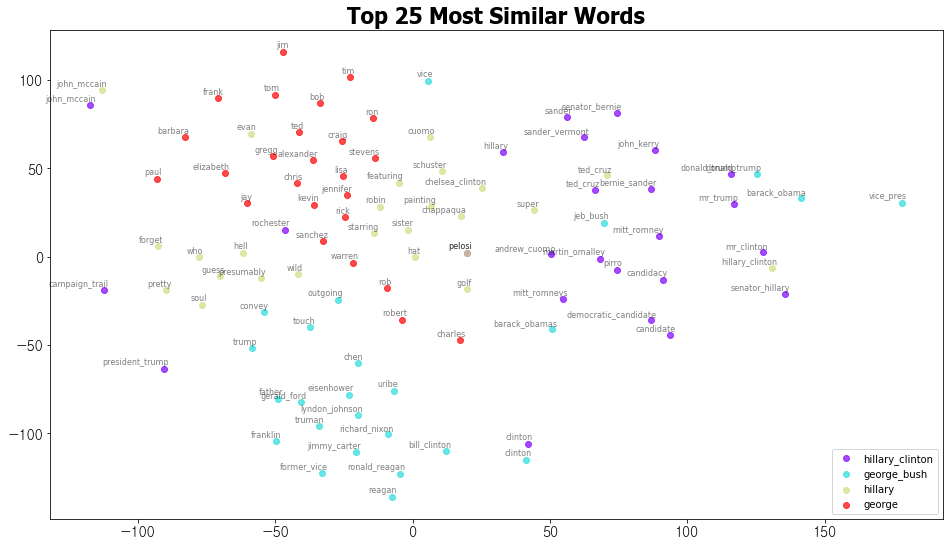

In [92]:
def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    gfont = {'fontname':'Gulim','size': 14}
    tfont = {'fontname':'Tahoma','size': 18}
    tbfont = {'fontname':'Tahoma','weight':'bold','size': 22}
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title,**tbfont)
    plt.xticks(**gfont)
    plt.yticks(**gfont)
    plt.grid(False)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Top 25 Most Similar Words', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words_slides.png')

In [84]:
keys = ['barack','hillary']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in w2v_model.wv.most_similar(word, topn=25):
        words.append(similar_word)
        embeddings.append(w2v_model.wv[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [85]:
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=25, n_components=2, init='pca', n_iter=1000, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)


In [86]:
word_clusters

[['rudy',
  'senator_barack',
  'concedes',
  'stood',
  'presidentelect_barack',
  'denver',
  'keynote',
  'son',
  'freshman',
  'picked',
  'teresa',
  'mario',
  'portrayed',
  'michelle',
  'bayh',
  'cool',
  'beating',
  'newest',
  'mr',
  'yes',
  'maverick',
  'following_transcript',
  'spoken',
  'herbert',
  'cox'],
 ['pretty',
  'chelsea_clinton',
  'hillary_clinton',
  'super',
  'soul',
  'painting',
  'guess',
  'featuring',
  'john_mccain',
  'hell',
  'pelosi',
  'forget',
  'hat',
  'chappaqua',
  'ted_cruz',
  'wild',
  'starring',
  'who',
  'sister',
  'schuster',
  'cuomo',
  'golf',
  'robin',
  'presumably',
  'evan']]

WARNING - 10:08:21: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
WARNING - 10:08:21: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


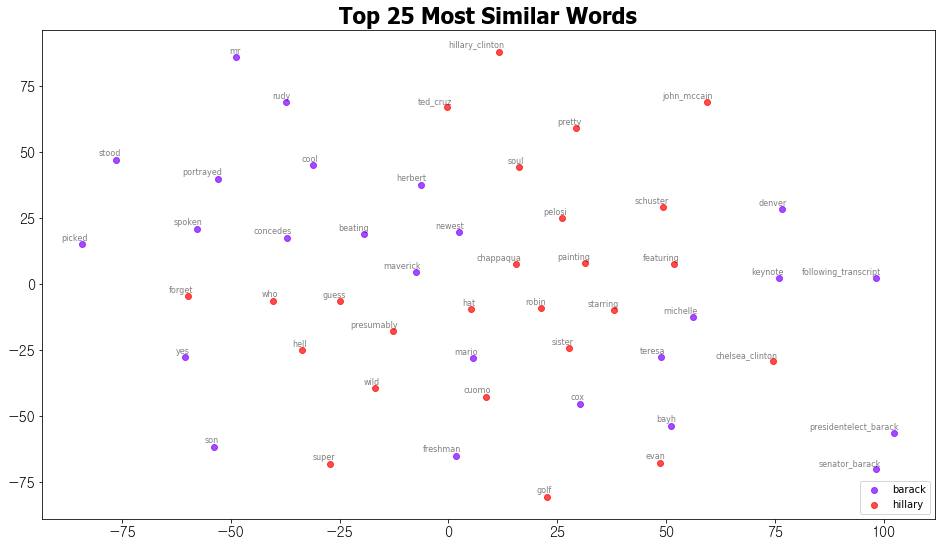

In [87]:
tsne_plot_similar_words('Top 25 Most Similar Words', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words_barack_hillary.png')

In [403]:
keys = ['sarah_palin']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in w2v_model.wv.most_similar(word, topn=25):
        words.append(similar_word)
        embeddings.append(w2v_model.wv[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [404]:
word_clusters

[['arnold_schwarzenegger',
  'bill_richardson',
  'funny',
  'haley',
  'rick_perry',
  'maverick',
  'david_paterson',
  'running_mate',
  'christie',
  'mitt_romney',
  'frontrunner',
  'ryan',
  'tim',
  'presidential_nominee',
  'lieutenant',
  'mel',
  'gov_chris',
  'davis',
  'mike',
  'charlotte',
  'mike_huckabee',
  'alan_keyes',
  'wisconsin',
  'jeb_bush',
  'wasnt']]